In [13]:
# LIBRERÍAS
!uv add -U ultralytics

from ultralytics import YOLO
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

Resolved 146 packages in 609ms                                       
Audited 129 packages in 0.04ms


## Configuración de entrenamiento

In [ ]:
# HIPERPARÁMETROS
epochs = 5
batch_size = 8
img_size = 640  
weights = "../yolov8n.pt"  
data_yaml = "../data/data.yaml

model = YOLO(weights).to(device)

## Entrenamiento del Modelo

In [10]:
model.train(
    data=data_yaml,         
    epochs=epochs,          
    imgsz=img_size,         
    batch=batch_size,
    verbose = True
)

Model summary (fused): 168 layers, 3,386,477 parameters, 0 gradients, 9.9 GFLOPs


FileNotFoundError: 'data/data.yaml' does not exist

## Prueba de predicción

In [34]:
# Ruta a los pesos entrenados
weights = "../runs/detect/train/weights/best.pt"

# Cargar el modelo
model = YOLO(weights)

# Ruta a la imagen o carpeta que quieres analizar
image_path = "../data/tortilla-francesa-perfecta.png" 


image 1/1 /Users/gonzalo/Documents/tf-machine-learning/notebooks/../data/tortilla-francesa-perfecta.png: 416x640 1 club_sandwich, 1 fish_and_chips, 1 omelette, 43.1ms
Speed: 1.3ms preprocess, 43.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /Users/gonzalo/Documents/tf-machine-learning/runs/detect/predict2
1 label saved to /Users/gonzalo/Documents/tf-machine-learning/runs/detect/predict2/labels


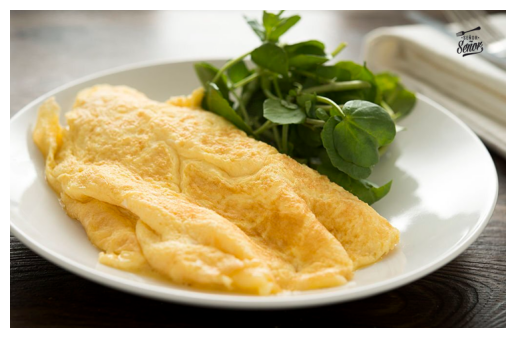

In [35]:
# Realizar predicción
results = model.predict(source=image_path, conf=0.01, save=True, save_txt=True, )

# Mostrar los resultados en la primera imagen procesada
img_path = results[0].path  # Ruta de la imagen con los resultados
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()